In [2]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# 그래프 기본 설정
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False
import matplotlib as mpl
import matplotlib.font_manager as fm

# 폰트 파일 경로 지정
font_path = '/content/drive/MyDrive/font/NanumGothic.ttf'

# 폰트 등록 및 matplotlib 설정
font_name = fm.FontProperties(fname=font_path).get_name()
fm.fontManager.addfont(font_path)
mpl.rc('font', family=font_name)

# 경고 뜨지 않게
import warnings
warnings.filterwarnings('ignore')

#저장라이브러리
import pickle

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# LabelEncoder
from sklearn.preprocessing import LabelEncoder

# 데이터를 학습용과 검증용으로 나눈다.
from sklearn.model_selection import train_test_split

import os

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이터톤/data/한번만구매한_고객데이터/one_time_buyers_all.csv')
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_hour,category_lvl1,category_lvl2,category_lvl3,category_lvl4,month
0,2019-10-13 13:25:29+00:00,purchase,5100443,2053013553341792533,electronics.clocks,garmin,340.59,303160429,8957377b-66b3-4661-ae91-5c2b5e29fd0e,2019-10-13,13.0,electronics,clocks,NaN,NaN,NaN
1,2019-10-09 15:51:08+00:00,purchase,17301479,2053013553853497655,NaN,NaN,29.89,371877401,d3103132-d38a-4399-9404-f99d03d243d0,2019-10-09,15.0,NaN,NaN,NaN,NaN,NaN
2,2019-10-18 11:19:59+00:00,purchase,2501816,2053013564003713919,appliances.kitchen.oven,artel,41.44,384989212,7472f245-e885-4c5e-b3b1-476a7b19b508,2019-10-18,11.0,appliances,kitchen,oven,NaN,NaN
3,2019-10-26 14:05:39+00:00,purchase,10700971,2053013561277416167,NaN,NaN,20.59,387300134,51d42df3-8ba8-493f-b780-41f09a74be28,2019-10-26,14.0,NaN,NaN,NaN,NaN,NaN
4,2019-10-24 17:54:48+00:00,purchase,12718429,2053013553559896355,NaN,cordiant,48.14,396222093,0ec20848-b6c5-41b5-bba8-132be4461915,2019-10-24,17.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451972,2020-03-31 23:49:41+00:00,purchase,1004835,2232732093077520756,construction.tools.light,samsung,199.87,588488017,84395d1c-4349-49e4-9581-94f63cfb034f,2020-03-31,23.0,construction,tools,light,NaN,2020-03
1451973,2020-03-31 23:54:30+00:00,purchase,100062704,2053013554658804075,electronics.audio.headphone,asus,812.12,624142677,8501ed7e-a926-450e-87ff-da17ce20f14f,2020-03-31,23.0,electronics,audio,headphone,NaN,2020-03
1451974,2020-03-31 23:55:08+00:00,purchase,1003319,2232732093077520756,construction.tools.light,apple,900.64,619860269,ea2efefc-95ea-49ce-9250-fef572c53b44,2020-03-31,23.0,construction,tools,light,NaN,2020-03
1451975,2020-03-31 23:58:19+00:00,purchase,100049773,2232732106860003995,NaN,NaN,234.96,620580925,c33fde42-a5de-4a1f-9e1c-2ac7518a7d41,2020-03-31,23.0,NaN,NaN,NaN,NaN,2020-03


In [6]:
df.drop(columns = ['month'])

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_hour,category_lvl1,category_lvl2,category_lvl3,category_lvl4
0,2019-10-13 13:25:29+00:00,purchase,5100443,2053013553341792533,electronics.clocks,garmin,340.59,303160429,8957377b-66b3-4661-ae91-5c2b5e29fd0e,2019-10-13,13.0,electronics,clocks,NaN,NaN
1,2019-10-09 15:51:08+00:00,purchase,17301479,2053013553853497655,NaN,NaN,29.89,371877401,d3103132-d38a-4399-9404-f99d03d243d0,2019-10-09,15.0,NaN,NaN,NaN,NaN
2,2019-10-18 11:19:59+00:00,purchase,2501816,2053013564003713919,appliances.kitchen.oven,artel,41.44,384989212,7472f245-e885-4c5e-b3b1-476a7b19b508,2019-10-18,11.0,appliances,kitchen,oven,NaN
3,2019-10-26 14:05:39+00:00,purchase,10700971,2053013561277416167,NaN,NaN,20.59,387300134,51d42df3-8ba8-493f-b780-41f09a74be28,2019-10-26,14.0,NaN,NaN,NaN,NaN
4,2019-10-24 17:54:48+00:00,purchase,12718429,2053013553559896355,NaN,cordiant,48.14,396222093,0ec20848-b6c5-41b5-bba8-132be4461915,2019-10-24,17.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451972,2020-03-31 23:49:41+00:00,purchase,1004835,2232732093077520756,construction.tools.light,samsung,199.87,588488017,84395d1c-4349-49e4-9581-94f63cfb034f,2020-03-31,23.0,construction,tools,light,NaN
1451973,2020-03-31 23:54:30+00:00,purchase,100062704,2053013554658804075,electronics.audio.headphone,asus,812.12,624142677,8501ed7e-a926-450e-87ff-da17ce20f14f,2020-03-31,23.0,electronics,audio,headphone,NaN
1451974,2020-03-31 23:55:08+00:00,purchase,1003319,2232732093077520756,construction.tools.light,apple,900.64,619860269,ea2efefc-95ea-49ce-9250-fef572c53b44,2020-03-31,23.0,construction,tools,light,NaN
1451975,2020-03-31 23:58:19+00:00,purchase,100049773,2232732106860003995,NaN,NaN,234.96,620580925,c33fde42-a5de-4a1f-9e1c-2ac7518a7d41,2020-03-31,23.0,NaN,NaN,NaN,NaN


In [37]:
# 1. 구매 이벤트만 추출
purchase_df = df[df['event_type'] == 'purchase'].copy()

# 2. user_id별 구매 횟수 계산
purchase_counts = purchase_df.groupby('user_id').size().reset_index(name='purchase_count')

# 3. 고객 유형 구분
one_time_buyers = purchase_counts[purchase_counts['purchase_count'] == 1]['user_id']
multi_time_buyers = purchase_counts[purchase_counts['purchase_count'] > 1]['user_id']

# 4. 구매 이력에서 해당 유저들의 기록 분리
df_one_time = purchase_df[purchase_df['user_id'].isin(one_time_buyers)].copy()
df_multi_time = purchase_df[purchase_df['user_id'].isin(multi_time_buyers)].copy()

# 5. 결과 확인
print(f"✅ 한 번만 구매한 고객 수: {df_one_time['user_id'].nunique():,}명")
print(f"✅ 두 번 이상 구매한 고객 수: {df_multi_time['user_id'].nunique():,}명")

✅ 한 번만 구매한 고객 수: 1,018,740명
✅ 두 번 이상 구매한 고객 수: 197,150명


In [11]:
purchase_df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_hour,category_lvl1,category_lvl2,category_lvl3,category_lvl4,month
0,2019-10-13 13:25:29+00:00,purchase,5100443,2053013553341792533,electronics.clocks,garmin,340.59,303160429,8957377b-66b3-4661-ae91-5c2b5e29fd0e,2019-10-13,13.0,electronics,clocks,NaN,NaN,NaN
1,2019-10-09 15:51:08+00:00,purchase,17301479,2053013553853497655,NaN,NaN,29.89,371877401,d3103132-d38a-4399-9404-f99d03d243d0,2019-10-09,15.0,NaN,NaN,NaN,NaN,NaN
2,2019-10-18 11:19:59+00:00,purchase,2501816,2053013564003713919,appliances.kitchen.oven,artel,41.44,384989212,7472f245-e885-4c5e-b3b1-476a7b19b508,2019-10-18,11.0,appliances,kitchen,oven,NaN,NaN
3,2019-10-26 14:05:39+00:00,purchase,10700971,2053013561277416167,NaN,NaN,20.59,387300134,51d42df3-8ba8-493f-b780-41f09a74be28,2019-10-26,14.0,NaN,NaN,NaN,NaN,NaN
4,2019-10-24 17:54:48+00:00,purchase,12718429,2053013553559896355,NaN,cordiant,48.14,396222093,0ec20848-b6c5-41b5-bba8-132be4461915,2019-10-24,17.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451972,2020-03-31 23:49:41+00:00,purchase,1004835,2232732093077520756,construction.tools.light,samsung,199.87,588488017,84395d1c-4349-49e4-9581-94f63cfb034f,2020-03-31,23.0,construction,tools,light,NaN,2020-03
1451973,2020-03-31 23:54:30+00:00,purchase,100062704,2053013554658804075,electronics.audio.headphone,asus,812.12,624142677,8501ed7e-a926-450e-87ff-da17ce20f14f,2020-03-31,23.0,electronics,audio,headphone,NaN,2020-03
1451974,2020-03-31 23:55:08+00:00,purchase,1003319,2232732093077520756,construction.tools.light,apple,900.64,619860269,ea2efefc-95ea-49ce-9250-fef572c53b44,2020-03-31,23.0,construction,tools,light,NaN,2020-03
1451975,2020-03-31 23:58:19+00:00,purchase,100049773,2232732106860003995,NaN,NaN,234.96,620580925,c33fde42-a5de-4a1f-9e1c-2ac7518a7d41,2020-03-31,23.0,NaN,NaN,NaN,NaN,2020-03


### total갯수와 맞지 않길래 확인해본 결과

In [25]:
# 유저별 구매 횟수
purchase_counts = df.groupby('user_id').size().reset_index(name='purchase_count')

# 2번 이상 구매한 유저만 필터링
multi_buyers = purchase_counts[purchase_counts['purchase_count'] >= 2]

# 이들의 전체 구매 기록 추출
multi_purchase_records = df[df['user_id'].isin(multi_buyers['user_id'])]

print(f"두 번 이상 구매한 고객의 전체 구매 기록 수: {len(multi_purchase_records)}")

두 번 이상 구매한 고객의 전체 구매 기록 수: 433237


In [38]:
unique_multi_buyers = multi_purchase_records['user_id'].nunique()
print(f"두 번 이상 구매한 고객의 수 (중복 없이): {unique_multi_buyers}")

두 번 이상 구매한 고객의 수 (중복 없이): 197150


### 고객별 재구매 주기량 확인

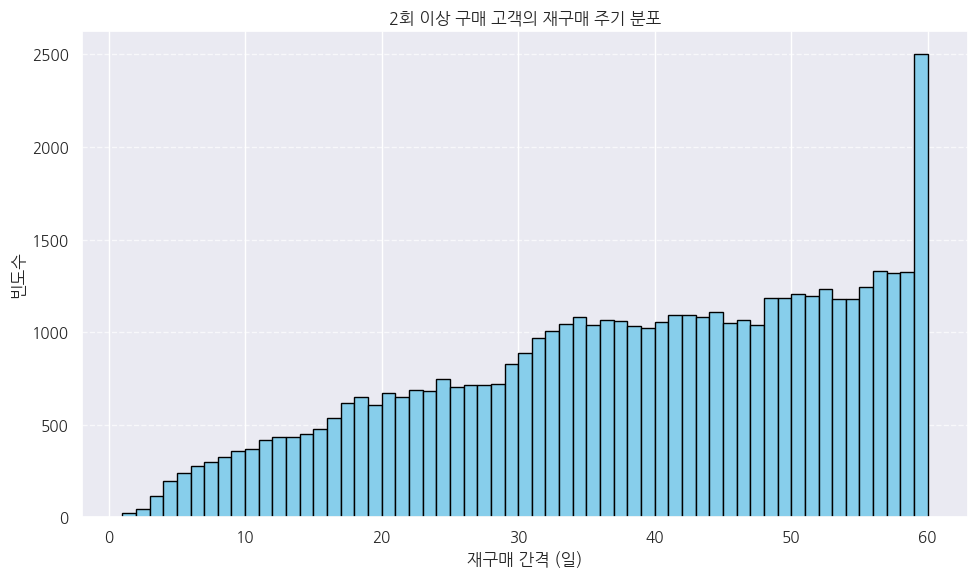

In [43]:
# 1. datetime 변환 (UTC 제거가 필요한 경우 제거)
# UTC 문자열 포함된 경우 자동 파싱
purchase_df['event_time'] = pd.to_datetime(purchase_df['event_time'], utc=True, errors='coerce')

# 2. 유저별 구매 횟수
purchase_counts = purchase_df.groupby('user_id').size().reset_index(name='purchase_count')

# 3. 2회 이상 구매한 고객 필터링
multi_buyers = purchase_counts[purchase_counts['purchase_count'] >= 2]['user_id']

# 4. 해당 고객들의 구매 기록만 추출
multi_purchase_df = purchase_df[purchase_df['user_id'].isin(multi_buyers)].copy()

# 5. 구매일 기준 정렬 후 이전 구매일 계산
multi_purchase_df = multi_purchase_df.sort_values(by=['user_id', 'event_time'])
multi_purchase_df['prev_purchase'] = multi_purchase_df.groupby('user_id')['event_time'].shift(1)

# 6. 재구매 주기 (일 단위) 계산
multi_purchase_df['days_between'] = (multi_purchase_df['event_time'] - multi_purchase_df['prev_purchase']).dt.days

# NaN 제외 (첫 구매에는 이전 구매가 없기 때문에 NaN)
valid_intervals = multi_purchase_df['days_between'].dropna()

plt.figure(figsize=(10,6))
plt.hist(valid_intervals, bins=range(1, 61), color='skyblue', edgecolor='black')  # 예: 60일 이하만 보기
plt.title('2회 이상 구매 고객의 재구매 주기 분포')
plt.xlabel('재구매 간격 (일)')
plt.ylabel('빈도수')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

